In [1]:
import pandas as pd
df=pd.read_csv('wine-quality.csv') # reading of the data
X=df.iloc[:,2:] # seperated the regressor columns
y=df.iloc[:,0] # slicing of response column
n=X.shape[0]  # number of items in the sample
p=X.shape[1] # p=number of parameters = number of regressors +1
print(n,p)

32 9


In [2]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[ 0.28037865 -0.5673905   0.89848937  0.89847061  0.95492536  0.76914094
  -0.54905621  0.81297401  0.76914094]
 [-0.72584005 -0.31413466  1.68441173  1.79157401  2.09230545  1.39296032
  -0.14359932  1.16692188  1.39296032]
 [ 0.53193332 -0.43102197  0.92032054  0.96717087  0.49997333  1.22282776
   0.39700987  0.63600008  1.22282776]
 [ 0.3642302   0.07548972  2.42667174  2.30682597  3.22968553  1.39296032
  -0.27875161  1.34389582  1.39296032]
 [ 1.37044889 -0.39205953  0.54919054  0.48626904  0.42414799  0.48558668
   1.61338055 -0.42584353  0.48558668]
 [ 0.28037865 -0.6647966   1.31328172  1.27632205  1.10657604  1.27953861
   0.12670528  0.98994795  1.27953861]
 [ 0.95119111 -0.5673905  -1.04448536 -1.09383698 -0.86488277 -1.15902805
  -1.0896654  -0.60281747 -1.15902805]
 [-1.31280095 -0.17776612 -0.38955006 -0.23508371 -0.40993074 -0.08152185
  -1.35996999  0.81297401 -0.08152185]
 [ 0.78348799 -0.33361588 -0.65152418 -0.71598554 -0.56158142 -0.76205208
   0.39700987 -0.95676

In [3]:
from sklearn.linear_model import Lasso
model= Lasso(alpha=1)
model.fit(X,y)


Lasso(alpha=1)

In [10]:
print('R squared training set', round(model.score(X,y), 2))

R squared training set 0.42


In [5]:
from sklearn.metrics import mean_squared_error

# Training data
y_hat = model.predict(X)
mse = mean_squared_error(y,y_hat)
print('MSE training set', round(mse, 2))

MSE training set 1.77


In [23]:
import numpy as np
alphas = np.linspace(0.01,250,500)/3000
coefs = []

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
coefs

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+01, tolerance: 9.720e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.646e+01, tolerance: 9.720e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.57

C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+00, tolerance: 9.720e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+00, tolerance: 9.720e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Mohankumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.13

[array([ 5.66675594e+00,  4.90487317e-03, -2.35601668e+00,  4.67307260e+00,
         1.24909340e-01, -1.38467396e-01, -1.48817735e+01, -2.60729170e-01,
         6.24122599e+01]),
 array([ 5.60986565e+00,  4.84686468e-03, -2.31154930e+00,  5.07165770e+00,
        -3.52151403e-01,  6.21460859e-01, -1.46707326e+01, -2.55931402e-01,
         0.00000000e+00]),
 array([ 5.59067746e+00,  4.75295086e-03, -2.31695560e+00,  4.96804234e+00,
        -2.33851620e-01,  7.01128937e-01, -1.44269041e+01, -2.51185349e-01,
         0.00000000e+00]),
 array([ 5.56894875e+00,  4.66098800e-03, -2.31915901e+00,  4.85927310e+00,
        -1.16353335e-01,  7.81712751e-01, -1.41851967e+01, -2.46440098e-01,
         0.00000000e+00]),
 array([ 5.54684173e+00,  4.56978167e-03, -2.32057128e+00,  4.74925408e+00,
        -0.00000000e+00,  8.63042076e-01, -1.39447245e+01, -2.41695088e-01,
         0.00000000e+00]),
 array([ 5.49598877e+00,  4.55039152e-03, -2.26129026e+00,  4.63492396e+00,
         0.00000000e+00,  8.7

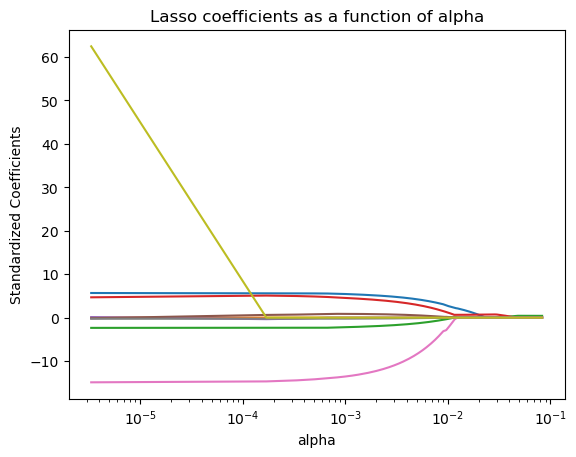

In [24]:
import matplotlib.pyplot as plt



ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');